In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Install all the required libs and data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

In [18]:
df = pd.read_csv("EPL_Soccer_MLR_LR.csv") 


In [19]:
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [20]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [22]:
df.dtypes

PlayerName                 object
Club                       object
DistanceCovered(InKms)    float64
Goals                     float64
MinutestoGoalRatio        float64
ShotsPerGame              float64
AgentCharges                int64
BMI                       float64
Cost                      float64
PreviousClubCost          float64
Height                    float64
Weight                    float64
Score                     float64
dtype: object

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
#numeric_df.corr()

Strongest correlations:
Cost                    Score                     0.963017
Score                   Cost                      0.963017
ShotsPerGame            MinutestoGoalRatio        0.950757
MinutestoGoalRatio      ShotsPerGame              0.950757
Weight                  PreviousClubCost          0.930904
PreviousClubCost        Weight                    0.930904
DistanceCovered(InKms)  MinutestoGoalRatio        0.924964
MinutestoGoalRatio      DistanceCovered(InKms)    0.924964
DistanceCovered(InKms)  ShotsPerGame              0.888800
ShotsPerGame            DistanceCovered(InKms)    0.888800
dtype: float64

Weakest correlations:
Score               BMI                   0.187558
BMI                 Score                 0.187558
                    Goals                 0.177032
Goals               BMI                   0.177032
Weight              Goals                 0.155844
Goals               Weight                0.155844
Cost                Weight                

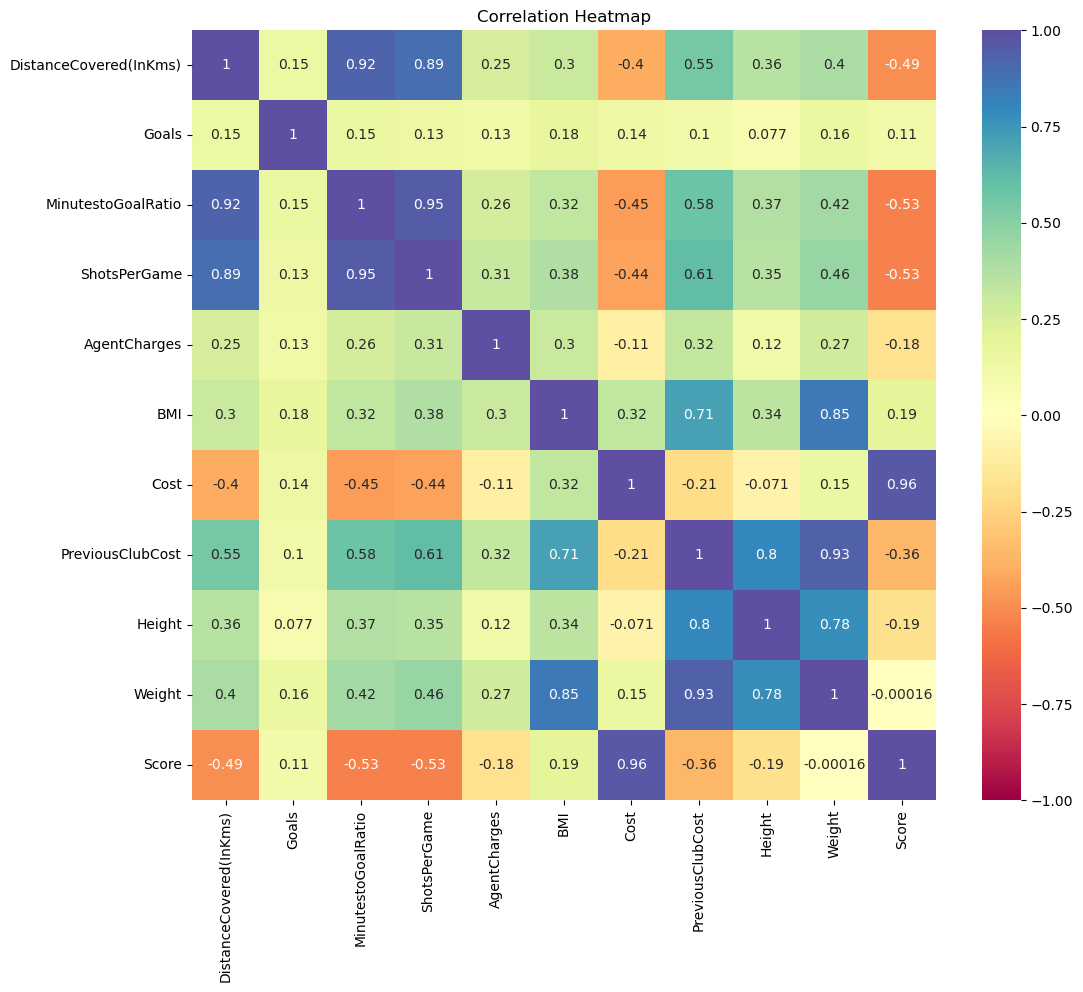

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already created your DataFrame 'df'
# If not, you'll need to load your data first

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Function to get insights from the correlation matrix
def get_correlation_insights(corr_matrix):
    # Get the most correlated pairs
    corr_pairs = corr_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
    strong_pairs = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1.0)]
    
    print("Strongest correlations:")
    print(strong_pairs.head(10))  # Print top 10 strongest correlations
    
    # Get the least correlated pairs
    weak_pairs = sorted_pairs[sorted_pairs.abs() < 0.2]
    
    print("\nWeakest correlations:")
    print(weak_pairs.head(10))  # Print top 10 weakest correlations
    
    # Identify variables with multicollinearity
    high_corr_vars = np.where(np.abs(corr_matrix) > 0.8)
    high_corr_vars = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                      for x, y in zip(*high_corr_vars) if x != y and x < y]
    
    print("\nPossible multicollinearity:")
    for var1, var2 in high_corr_vars:
        print(f"{var1} and {var2}: {corr_matrix.loc[var1, var2]:.2f}")
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function to get insights
get_correlation_insights(corr_matrix)

In [32]:
#Since we will delaing with Simple LR- lets consider only one predictor varibale here with strongest correlations i.e Cost

Text(0.5, 1.0, 'Scatter plot between Cost and Score')

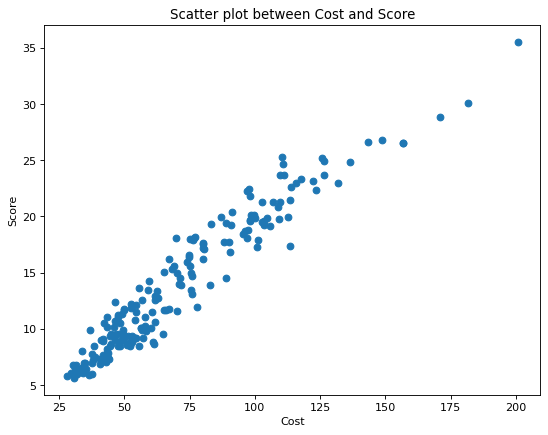

In [40]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

In [41]:
x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [42]:
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Thu, 11 Jul 2024   Prob (F-statistic):                   3.84e-144
Time:                        12:22:26   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           6.91e-88
Time:                        12:25:30   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

const    0.947185
Cost     0.182083
dtype: float64


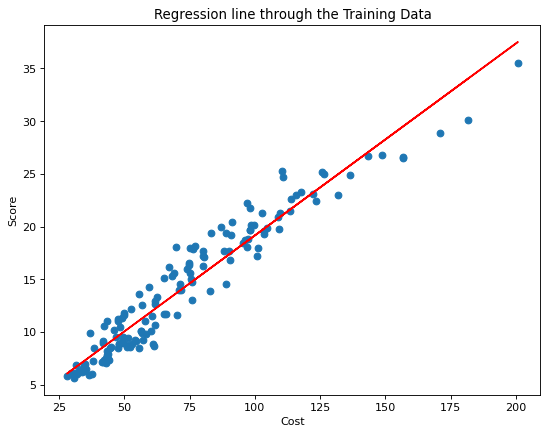

In [44]:
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

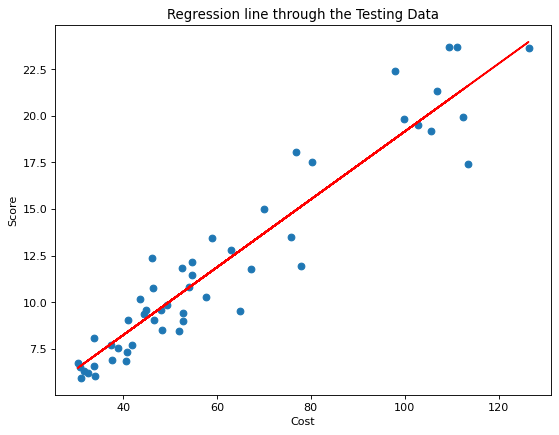

In [45]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()

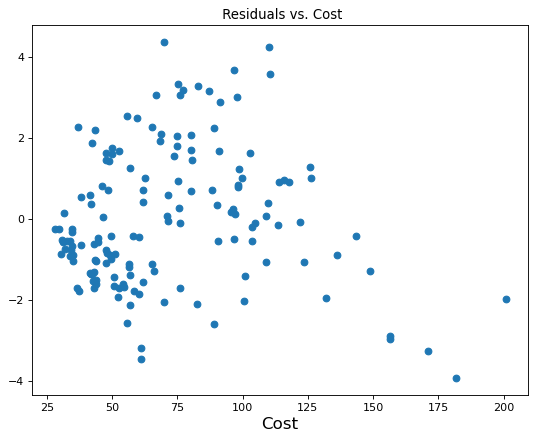

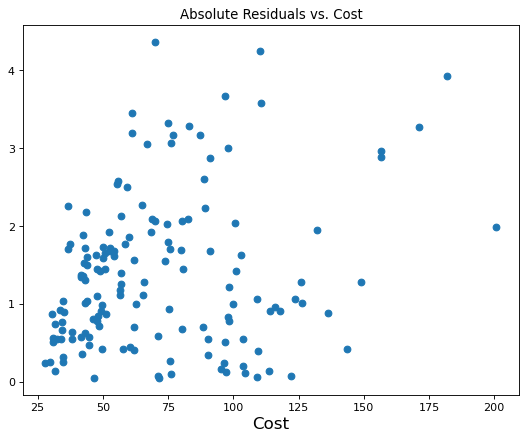

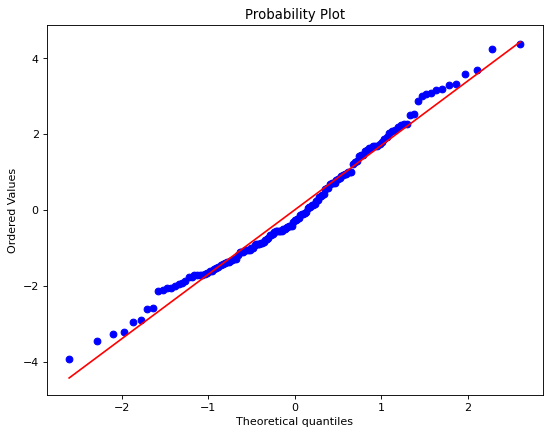

<Figure size 640x480 with 0 Axes>

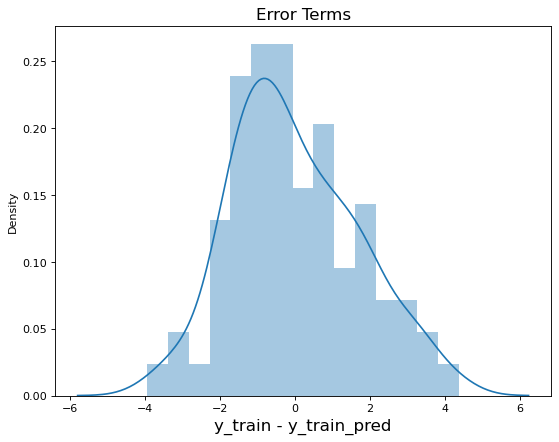

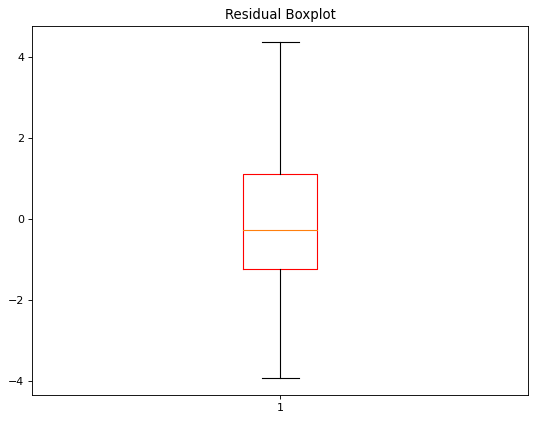

In [46]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');


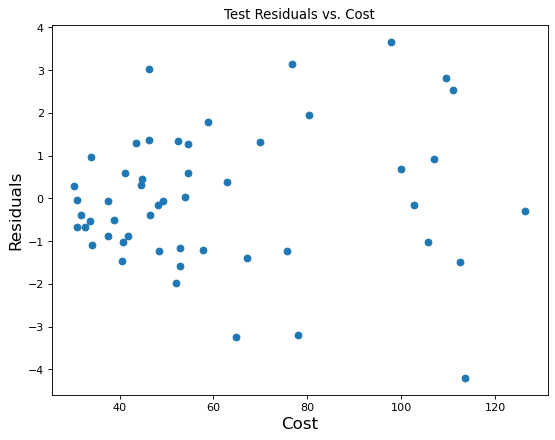

In [47]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

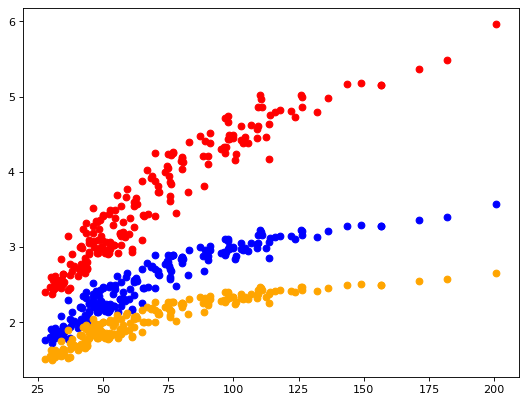

In [48]:

#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');


In [49]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           9.72e-75
Time:                        14:13:46   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

const    1.967367
Cost     0.023433
dtype: float64


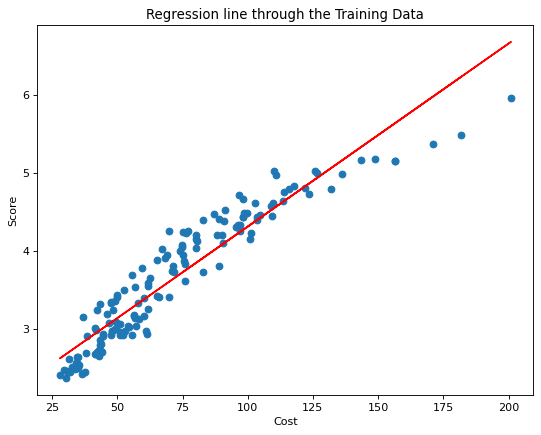

In [50]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()

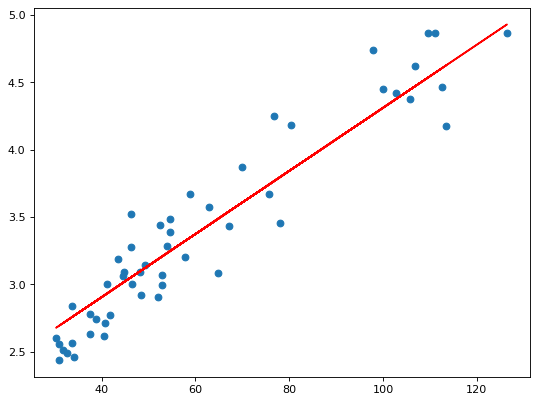

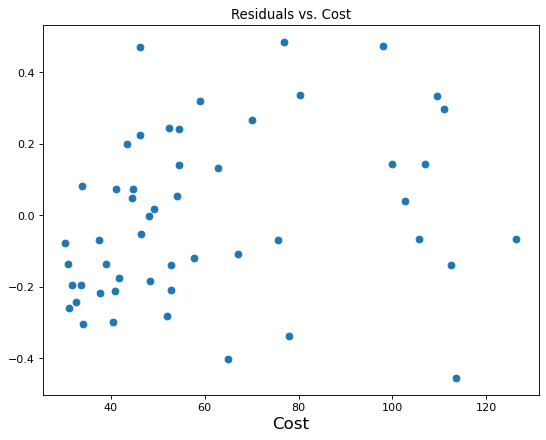

In [51]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination